# Homework 5

## ASTR 5900, Fall 2017, University of Oklahoma

### Bayesian Statistics

# Problem 1

Here you are to have a qualitative and quantitative discussion on the differences between frequentist and Bayesian statistics.

In the year 3001, students at the University of Mars are projecting their final grades in a machine learning course.  Students in this machine learning course are examined every Earth week, and five weeks have passed in the semester.  One such student, Calculon, has received scores of 92, 84, 95, 100, and 93 thus far.  Calculon believes that his scores in the first few weeks of class will be reflected in the rest of the semester.

For this problem you may make assumptions about what is known about Calculon's test results, i.e. his underlying test score variance.  Such assumptions should be explained in your answers.

### Part A

If Calculon is a frequentist, what would he predict to be his final score in the course?  What would he say about the uncertainty of his score?  Calculate these results.

In [3]:
import numpy as np
from matplotlib import pyplot as plt

s=np.array([92,84,95,100,93])
print 'If Calculon were a frequentist, he would expect his score to be', s.mean()
print 'His uncertainty would be', s.std()

If Calculon were a frequentist, he would expect his score to be 92.8
His uncertainty would be 5.1923019943


### Part B

If Calculon is a Bayesian, what would he predict his final score to be?  What is his confidence in this prediction?  Find these information numerically.  Since Calculon is a Bayesian in this example, he needs to choose a reasonable prior.  He notes that the average grade in the section from the previous year was a 60.  **Hint**: For the prior, think about how grades are designed to be distributed in classes.

For the prior, we are going to make a normal distribution centered around 60 and pick a sigma value that seems reasonable

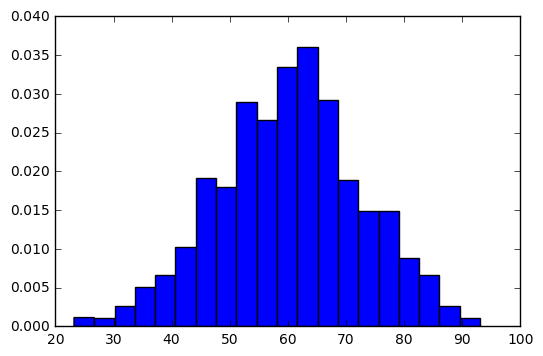

93.0466581595


In [4]:
d=np.random.normal(60,12,1000)
counts, bins, ignored = plt.hist(d,20,normed=True)
plt.show()
print d.max()

Setting up posterior probability distribution and iterating over different standard deviations of the prior

for sigma = 5 most likely grade is 75
for sigma = 10 most likely grade is 85
for sigma = 12 most likely grade is 87
for sigma = 15 most likely grade is 88
for sigma = 20 most likely grade is 90


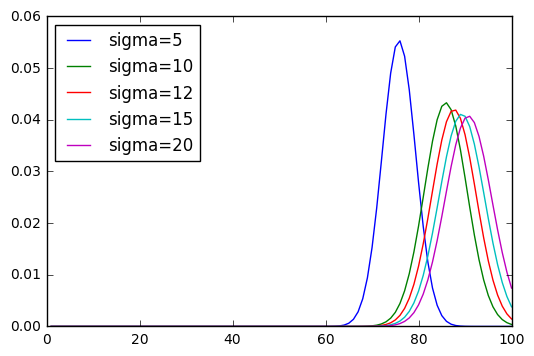

90


In [5]:
x=np.linspace(1,100,100)
dx=x[1]/x[0]

def gaussian(x, mu, sigma):
    return np.exp(-0.5*((x-mu)/sigma)**2)/sigma/np.sqrt(2*np.pi)

def prior(x,sigma):
    prior = gaussian(x,60,sigma)
    return prior/sum(prior)/dx

def likelihood(x):
    likelihood = gaussian(x,92.8,5.1923)
    return likelihood/sum(likelihood)/dx
def posterior(x):
    post = likelihood(x) * prior(x,sigma)
    return post/np.sum(post)/dx


for i in range(5):
    if i == 0:
        sigma = 5
        y = posterior(x)
        plt.plot(x,y,label='sigma=5')
        print 'for sigma = 5 most likely grade is', np.argmax(y)
    if i == 1:
        sigma = 10
        y = posterior(x)
        plt.plot(x,y,label='sigma=10')
        print 'for sigma = 10 most likely grade is', np.argmax(y)
    if i == 2:
        sigma = 12
        y = posterior(x)
        plt.plot(x,y,label='sigma=12')
        print 'for sigma = 12 most likely grade is', np.argmax(y)
    if i ==3: 
        sigma = 15
        y = posterior(x)
        plt.plot(x,y,label='sigma=15')
        print 'for sigma = 15 most likely grade is', np.argmax(y)
    if i == 4:
        sigma = 20
        y = posterior(x)
        plt.plot(x,y,label='sigma=20')
        print 'for sigma = 20 most likely grade is', np.argmax(y)
    
    
    
plt.legend(loc='best')
plt.show()


print np.argmax(y)


    

Greater standard deviations in the normal distribution for previous grades in the class give Calculon a better chance of getting a higher grade.

# Problem 2

Use Bayesian methods to estimate the parameters of the spectral data from HW3.

### Part A

Write down, in $\LaTeX$ preferably, the likelihood of obtaining a measurement $x_i$ from a model that is a mixture of two Gaussian distributions and a uniform distribution.  

In some sense there are 7 parameters total: the amplitudes of the Gaussians and uniform distributions (3), and the mean and variance of the Gaussians (4).  However, the normalization condition ensures that the 3 amplitudes are related.

$$ p(x_i | A, \mu, \sigma ) = A_1 e^{\frac{-(x-\mu_1)^2}{2\sigma_1 ^2}} + A_2 e^{\frac{-(x-\mu_2)^2}{2\sigma_2 ^2}} + A_3$$


$$  A_1 = \frac{a_1}{\sqrt{2\pi}\sigma_1} $$

$$  A_2 = \frac{a_2}{\sqrt{2\pi}\sigma_2} $$ 

$$ A_3 = \frac{1-(a_1+a_2)}{W}  $$


$$ p(x_i | A, \mu, \sigma ) = \frac{a_1}{\sqrt{2\pi}\sigma_1} e^{\frac{-(x-\mu_1)^2}{2\sigma_1 ^2}} + \frac{a_2}{\sqrt{2\pi}\sigma_2}e^{\frac{-(x-\mu_2)^2}{2\sigma_2 ^2}} + \frac{1-a_1-a_2}{W} $$


### Part B

Again using $\LaTeX$, write down a reasonable prior for the amplitudes of the Gaussians.

A reasonable prior for the amplitudes of the Gaussians is

$$P(a|I)= \begin{cases} 1 & a_{min} \leq a \leq a_{max}, \\ 0 & \mbox{otherwise}.\end{cases} $$


Where $a_{min} = 0$ and $a_{max}$ is a reasonable estimate determined by the data.

### Part C
Load data generated from the a probability distribution with the shape of the emission line data from HW4. This data is located at line-sample.dat from the class GitHub repository.


Sample the posterior distribution (that you must determine from the previous parts of this HW) on a grid of possible values for the amplitudes of the components (two Gaussians plus a background) For now, fix the other parameters (mu's and sigma's) to the values found in the previous homework via scipy.curve_fit.

What is the resulting point estimates and credible region for the amplitudes? How do these estimates compare to the curve fit results from HW4?


Note that your estimates in this problem will not resemble the optimal parameters found in HW4 due to the fact that the curve in HW4 is not normalized. You may wish to find a normalization factor to compare your results.

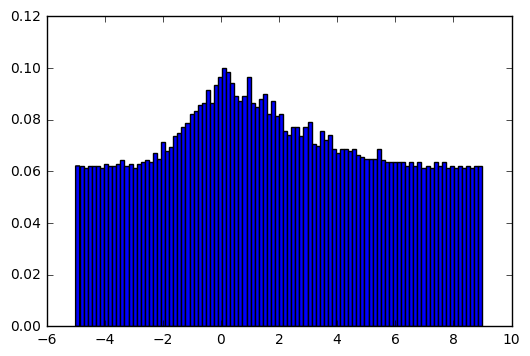

In [8]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('line-sample.dat',skiprows=1)
plt.hist(data,bins=100,normed=True)
plt.show()




In [9]:
mu1,mu2 = 0.131,1.675
sigma1,sigma2 = 1.03,2.16

In [10]:
amin,amax = 0, 0.03

def logprior(a1,a2):
    const = 0
    if a1 < amin or a1> amax:
        return -np.inf
    if a2 < amin or a2 > amax:
        return -np.inf
    return const

def gaussian(x,mu,sig):
    return np.exp(-0.5*((x-mu)/sig)**2)
    
def loglike(a1,a2):
    bg = (1-(a1*sigma1 + a2*sigma2)*np.sqrt(2*np.pi))/14
    return np.sum(np.log(bg + a1*gaussian(data, mu1, sigma1) + a2*gaussian(data,mu2,sigma2)))
    

def logpost(a1,a2):
    return logprior(a1,a2)+loglike(a1,a2)

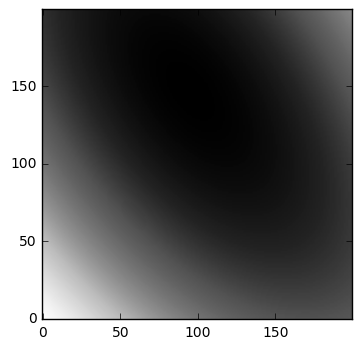

In [11]:
a1s = np.linspace(amin,amax,200)
a2s = np.linspace(amin,amax,200)

loggrid = np.zeros((200,200))

for i, a1 in enumerate(a1s):
    
    for j, a2 in enumerate(a2s):
        
        loggrid[i,j] = logpost(a1,a2)
        
        
plt.imshow(loggrid,origin='lower',cmap='Greys')
plt.show()
        



In [12]:
max_val = np.max(loggrid)
max_ind = np.argmax(loggrid)
print(loggrid.shape)

print(max_ind)

(200, 200)
29295


In [13]:
a1s_2d, a2s_2d = np.meshgrid(a1s, a2s)



a1s_2d = a1s_2d.flatten()
a2s_2d = a2s_2d.flatten()



a1s_best = a1s_2d[max_ind]
a2s_best = a2s_2d[max_ind]

print(a1s_best, a2s_best)

(0.014321608040201004, 0.022010050251256279)


### Part D

For each of the Gaussian amplitudes, find the marginalized posterior distribution. Do this by integrating over all other possible (non-fixed) parameter values, which can be performed by summing portions of the log posterior grid in part C. Refer to Lecture 5. Use the marginalized pdf to find new point estimates as the posterior means. Compare to your previous results.

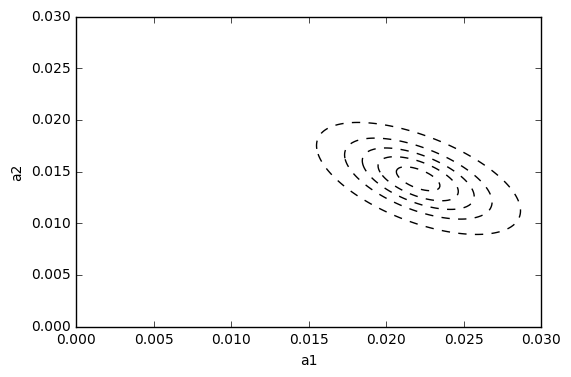

In [14]:
levels = np.log(np.array([.1, .3, .5, .7, .9]))+max_val

X, Y = np.meshgrid(a2s, a1s)
CS = plt.contour(Y, X, loggrid, levels, colors='k', linewidths=1)
plt.xlabel('a1')
plt.ylabel('a2')
plt.show()

In [15]:
new_grid = loggrid - np.max(loggrid) + 3

print(np.max(loggrid))
print(np.argmax(loggrid))

print(new_grid)

-26284.9557476
29295
[[-102.61754854 -101.68086627 -100.75001129 ...,  -25.40497767
   -25.54547797  -25.69126047]
 [-101.72442577 -100.79097286  -99.86334462 ...,  -25.11510303
   -25.25858144  -25.40734202]
 [-100.83643635  -99.90620665  -98.98179901 ...,  -24.82947731
   -24.97593078  -25.12766639]
 ..., 
 [ -13.99435272  -13.60427041  -13.219802   ...,  -43.03797772
   -43.72415415  -44.4158158 ]
 [ -13.94304433  -13.55539664  -13.173363   ...,  -43.48024198
   -44.16905544  -44.8633561 ]
 [ -13.89535879  -13.51014324  -13.13054189 ...,  -43.92582158
   -44.61727139  -45.31421041]]


In [16]:


samples=200

a1s = np.linspace(0, 0.03, samples)
b1s = np.linspace(0, 0.03, samples)
da = a1s[1] - a1s[0]



def p_a1():
    
    #for every value of a1, sum the corresponding column of a2's
    p = np.zeros(len(a1s))
    
    for index in range(len(a1s)):
        
        p_a1a2 = np.exp(new_grid[index, :])
        p[index] = np.sum(p_a1a2)
        
    return p/np.sum(p)/da

def p_a2():

    p = np.zeros(len(a2s))
    
    for index in range(len(a2s)):
        
        p_a1a2 = np.exp(new_grid[:, index])
        p[index] = np.sum(p_a1a2)
        
    return p/np.sum(p)/da

def find_a1():
    
    exp_a1 = 0
    for a1 in a1s:
        exp_a1 += a1*p_a1(a1, x)
        
    return exp_a1

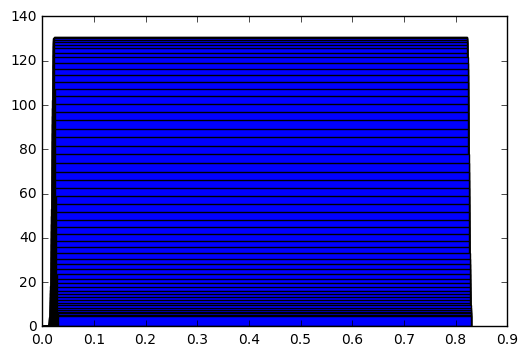

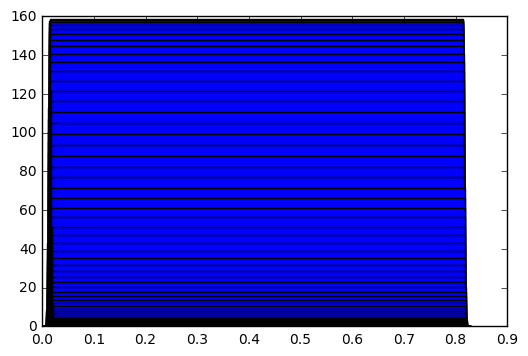

(0.022017027545449659, 0.014328125333242073)


In [17]:
plt.bar(a1s, p_a1())
plt.show()


plt.bar(a2s, p_a2())
plt.show()

a1_avg = np.sum(np.asarray(a1s)*p_a1())*da
a2_avg = np.sum(np.asarray(a2s)*p_a2())*da

print(a1_avg, a2_avg)

These results are the same as our results from part C

### Part E

What would this problem be like if it had asked you to find point estimates for all of the distribution parameters in Part A?  What difficulties would emerge and why?  What if you had 100 model parameters?  1000?

In order to find point estimates for 2 parameters, we had to create a 2 dimensional grid and sample posterior probability values at each location on the grid to find the best point. For each model parameter added, you have to add another dimension to the grid. This could mean that as N dimensions are added computation time increases by the Nth power. This will quickly increase computation time making calculations for 100 or 1000 model parameters implausible.